<a href="https://colab.research.google.com/github/2203A52132/DAUP-PROJECT/blob/main/2203A52132_PROJECT_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = '/content/Animals_audio_dataset.zip'
extract_path = '/content/Animals_audio_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Extracted to: {extract_path}")


Extracted to: /content/Animals_audio_dataset


In [ ]:
# Constants
MAX_LEN = 40
SAMPLE_RATE = 22050
N_MFCC = 13

# Feature extraction function
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC).T
        if mfcc.shape[0] < MAX_LEN:
            mfcc = np.pad(mfcc, ((0, MAX_LEN - mfcc.shape[0]), (0, 0)), mode='constant')
        else:
            mfcc = mfcc[:MAX_LEN]
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [ ]:
# Load data
import os # This import is likely already present at the top of the file. But if it's not add this import line
import numpy as np # Import the numpy library and assign it the alias 'np'

features = []
labels = []

# Define AUDIO_PATH, assuming extract_path from the previous cell is the correct path
AUDIO_PATH = '/content/Animals_audio_dataset'

for root, dirs, files in os.walk(AUDIO_PATH):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            label = os.path.basename(root)
            mfcc = extract_features(file_path)
            features.append(mfcc)
            labels.append(label)

X = np.array(features)
y = np.array(labels)

Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_13.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_9.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_7.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_1.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_25.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_18.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_5.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_15.wav: name 'librosa' is not defined
Error processing /content/Animals_audio_dataset/DATASET/Animals/cat/

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Constants
MAX_LEN = 40
SAMPLE_RATE = 22050
N_MFCC = 13

# Feature extraction function
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC).T
        if mfcc.shape[0] < MAX_LEN:
            mfcc = np.pad(mfcc, ((0, MAX_LEN - mfcc.shape[0]), (0, 0)), mode='constant')
        else:
            mfcc = mfcc[:MAX_LEN]
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None  # Return None upon error

# Load data
features = []
labels = []

# Define AUDIO_PATH, assuming extract_path from the previous cell is the correct path
AUDIO_PATH = '/content/Animals_audio_dataset'

for root, dirs, files in os.walk(AUDIO_PATH):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            label = os.path.basename(root)
            mfcc = extract_features(file_path)
            # Only append if mfcc is not None
            if mfcc is not None:
                features.append(mfcc)
                labels.append(label)

X = np.array(features)
y = np.array(labels)

# Label encoding
le = LabelEncoder()
y_encoded = tf.keras.utils.to_categorical(le.fit_transform(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Data loaded. Shape: {X.shape}, Classes: {le.classes_}")

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(MAX_LEN, N_MFCC)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Data loaded. Shape: (75, 40, 13), Classes: ['cat' 'dog' 'elephant' 'horse' 'lion']
Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.0958 - loss: 1.6906 - val_accuracy: 0.6667 - val_loss: 1.4308
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4596 - loss: 1.4569 - val_accuracy: 0.6667 - val_loss: 1.3446
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5537 - loss: 1.3607 - val_accuracy: 0.6667 - val_loss: 1.2692
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6254 - loss: 1.2201 - val_accuracy: 0.6667 - val_loss: 1.1883
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6162 - loss: 1.1363 - val_accuracy: 0.6000 - val_loss: 1.0885
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6296 - loss: 1.0407 - val_accuracy: 0.7333 - val_loss: 1.0284
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6867 - loss: 0.8168 - val_accuracy: 0.8000 - val_loss: 0.9836
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56

In [ ]:
from torch.utils.data import Dataset, DataLoader, random_split
import torchaudio
import os
import torch

class BirdAudioMFCCDataset(Dataset):
    def __init__(self, root_dir, n_mfcc=13):
        self.samples = []
        self.labels = []
        self.classes = sorted(os.listdir(root_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.n_mfcc = n_mfcc

        for label in self.classes:
            label_dir = os.path.join(root_dir, label)
            for file in os.listdir(label_dir):
                if file.endswith('.wav'):
                    self.samples.append(os.path.join(label_dir, file))
                    self.labels.append(self.class_to_idx[label])

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        audio_path = self.samples[idx]
        label = self.labels[idx]
        waveform, sample_rate = torchaudio.load(audio_path)
        mfcc_transform = torchaudio.transforms.MFCC(
            sample_rate=sample_rate,
            n_mfcc=self.n_mfcc,
            melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40}
        )
        mfcc = mfcc_transform(waveform).squeeze(0)  # Shape: [n_mfcc, time]
        return mfcc, label


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AudioCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.fc1 = nn.Linear(32 * 2 * 19, 64)  # Adjust shape after flattening
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, n_mfcc, time]
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


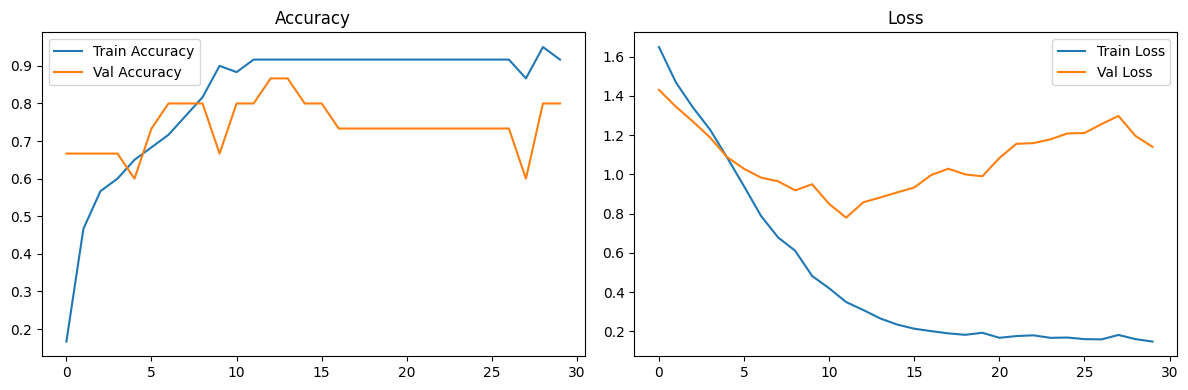

In [ ]:
import matplotlib.pyplot as plt
# Accuracy and loss plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.tight_layout()
plt.show()

In [ ]:
# Import the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Get unique classes in y_true and y_pred
unique_classes = np.unique(np.concatenate((y_true, y_pred)))

# Filter le.classes_ to include only the unique classes
filtered_target_names = [le.classes_[i] for i in unique_classes]

print(classification_report(y_true, y_pred, target_names=filtered_target_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
              precision    recall  f1-score   support

         cat       0.78      1.00      0.88         7
         dog       1.00      0.25      0.40         4
    elephant       0.67      1.00      0.80         2
        lion       1.00      1.00      1.00         2

    accuracy                           0.80        15
   macro avg       0.86      0.81      0.77        15
weighted avg       0.85      0.80      0.76        15



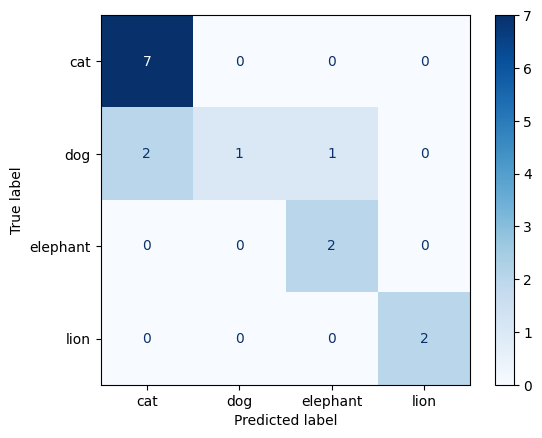

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function
from sklearn.metrics import ConfusionMatrixDisplay # Import the ConfusionMatrixDisplay class

cm = confusion_matrix(y_true, y_pred)

# Get the unique labels from the true labels
unique_labels = np.unique(y_true)

# Filter le.classes_ to include only the unique labels present in y_true
display_labels = [le.classes_[i] for i in unique_labels]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
!pip install librosa resampy numpy
!pip install librosa resampy numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.5 MB/s eta 0:00:00


In [ ]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from google.colab import files
import os

In [ ]:
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050, duration=4.0)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        if mfccs.shape[1] < 40:
            pad_width = 40 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :40]
        return mfccs.T
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

In [ ]:
# Step 5: Prediction function
def predict_gender(audio_file_path):
    mfccs = extract_features(audio_file_path)
    if mfccs is not None:
        mfccs = np.expand_dims(mfccs, axis=0)
        prediction = model.predict(mfccs)
        predicted_class = np.argmax(prediction)
        predicted_label = le.inverse_transform([predicted_class])[0]
        return predicted_label
    else:
        return "Error extracting features."

In [ ]:

import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicteds_sound = predict_gender(audio_file_path)
    print(f"Predicted Birds audio: {audio_file_path}: {predicteds_sound}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicteds_sound})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)


Using file: /content/Animals_audio_dataset/DATASET/Animals/cat/cat_1_part_13.wav


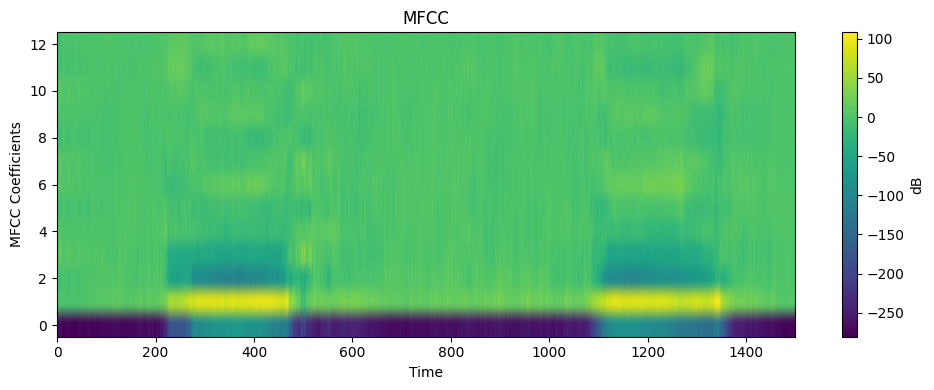

In [ ]:
import os
import torchaudio
import matplotlib.pyplot as plt
from torchaudio.transforms import MFCC

# Path to extracted dataset
dataset_path = '/content/Animals_audio_dataset'

# Pick the first .wav file found in the dataset
def find_first_wav_file(path):
    for root, _, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                return os.path.join(root, file)
    return None

audio_path = find_first_wav_file(dataset_path)
print(f"Using file: {audio_path}")

# Load audio
waveform, sample_rate = torchaudio.load(audio_path)

# Compute MFCC
mfcc_transform = MFCC(sample_rate=sample_rate, n_mfcc=13, melkwargs={'n_fft': 400, 'hop_length': 160, 'n_mels': 40})
mfcc = mfcc_transform(waveform)

# Plot MFCC
plt.figure(figsize=(10, 4))
plt.imshow(mfcc[0].numpy(), origin='lower', aspect='auto', cmap='viridis')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar(label='dB')
plt.tight_layout()
plt.show()